In [4]:
import csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as mp
import tensorflow as tf
import keras
from keras.models import model_from_json

In [2]:
bins = 128
seedmax = 20 # opens seed files 0 - 19. Lost too much data due to kernel crashes, so these got broken up
trainx = []
trainy = []
validx = []
validy = []

In [3]:
#This is not a ... pythonic [barf]... way of reading data, but python is stupid about pointers, so deal with it
for i in range(seedmax):
    with open('test_pots'+str(i)+'.csv', 'r') as csvfile:
        flurg = csv.reader(csvfile)
        for row in flurg:
            trainx.append([float(num) for num in row])
    with open('test_out'+str(i)+'.csv', 'r') as csvfile:
        flurg = csv.reader(csvfile)
        for row in flurg:
            trainy.append([float(num) for num in row])
    with open('valid_pots'+str(i)+'.csv', 'r') as csvfile:
        flurg = csv.reader(csvfile)
        for row in flurg:
            validx.append([float(num) for num in row])
    with open('valid_out'+str(i)+'.csv', 'r') as csvfile:
        flurg = csv.reader(csvfile)
        for row in flurg:
            validy.append([float(num) for num in row])

In [5]:
model = Sequential()
model.add(Dense(127, input_dim=127, activation='softplus'))
model.add(Dense(127, activation='softplus'))
model.add(Dense(127, activation='softplus'))
model.add(Dense(127, activation='softplus'))
model.add(Dense(127, activation='softplus'))
model.add(Dense(127, activation='softplus'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [6]:
trainx = np.array(trainx)
trainy = np.array(trainy)
validx = np.array(validx)
validy = np.array(validy)

In [33]:
def plot(x, y, model):
    mp.plot(model.predict(np.array([x]))[0], label='prediction')
    mp.plot([x[i]/max(x) for i in range(bins - 1)], label='potential')
    mp.plot(y, label='solution')
    mp.legend()
    mp.show()

In [7]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [9]:
model = loaded_model

In [15]:
pred = [model.predict(np.array([x]))[0] for x in validx]

In [19]:
errors = [np.mean(np.abs(pred[i] - validy[i])) for i in range(len(pred))]

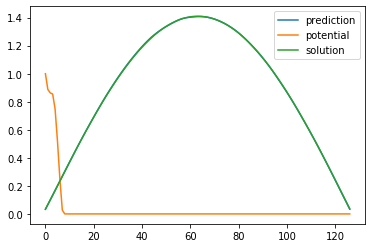

In [34]:
idxmin = errors.index(min(errors))
plot(validx[idxmin], validy[idxmin], model)

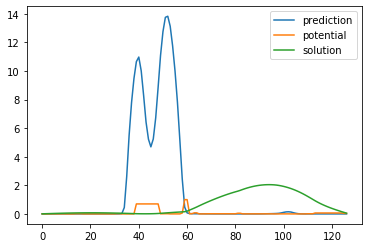

In [35]:
idxmax = errors.index(max(errors))
plot(validx[idxmax], validy[idxmax], model)

In [28]:
errors[idxmaz]

2.25426939694438